In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import seaborn as sns # seaborn library for graph aesthetics 
import json
import csv


In [4]:
crime_data = pd.read_csv('../project_one/NYC_data/NYPD_Arrest_YTD_Data/2020vs2019_Top7.csv')
crime_data

,Type of Crime,2020_(Week-to-Date),2019_(Week-to-Date),%Chg_(Week-to-Date),2020_(28-Day),2019_(28-Day),%Chg_(28-Day),2020_(Year-to-Date),2019_(Year-to-Date),%Chg_(Year-to-Date),%Chg_(2-Year),%Chg_(10-Year-(2010)),%Chg_(27-Year-(1993))
0,Murder,2,4,-50.0,16,20,-20.0,69,78,-11.5,6.2,-44.4,-86.4
1,Rape,12,42,-71.4,79,145,-45.5,366,472,-22.5,-12.4,19.2,-52.8
2,Robbery,139,218,-36.2,753,853,-11.7,"3,515","2,871",22.4,10.5,-22.9,-84.0
3,Felony Assault,262,394,-33.5,"1,285","1,556",-17.4,"4,820","4,688",2.8,1.5,20.5,-48.2
4,Burglary,219,182,20.3,828,712,16.3,"3,221","2,580",24.8,12.2,-29.0,-87.3
5,Gr. Larceny,317,783,-59.5,"1,945","2,991",-35.0,"10,131","9,965",1.7,-2.1,15.2,-49.3
6,G.L.A.,120,68,76.5,439,281,56.2,"1,627",988,64.7,36.6,-33.3,-94.4
7,Transit,31,44,-29.5,139,178,-21.9,716,600,19.3,22.6,35.1,NaN
8,Housing,60,85,-29.4,317,373,-15.0,"1,187","1,176",0.9,0.1,26.4,NaN
9,Petit Larceny,960,"1,528",-37.2,"5,120","6,052",-15.4,"22,111","20,342",8.7,9.0,18.4,NaN


In [5]:
# extract top 7 major crimes 
seven_major = ["Murder", "Rape", "Robbery", "Felony Assault","Burglary", "Gr. Larceny", "G.L.A."]
top_seven = crime_data[crime_data["Type of Crime"].isin(seven_major)]

top_seven

,Type of Crime,2020_(Week-to-Date),2019_(Week-to-Date),%Chg_(Week-to-Date),2020_(28-Day),2019_(28-Day),%Chg_(28-Day),2020_(Year-to-Date),2019_(Year-to-Date),%Chg_(Year-to-Date),%Chg_(2-Year),%Chg_(10-Year-(2010)),%Chg_(27-Year-(1993))
0,Murder,2,4,-50.0,16,20,-20.0,69,78,-11.5,6.2,-44.4,-86.4
1,Rape,12,42,-71.4,79,145,-45.5,366,472,-22.5,-12.4,19.2,-52.8
2,Robbery,139,218,-36.2,753,853,-11.7,"3,515","2,871",22.4,10.5,-22.9,-84.0
3,Felony Assault,262,394,-33.5,"1,285","1,556",-17.4,"4,820","4,688",2.8,1.5,20.5,-48.2
4,Burglary,219,182,20.3,828,712,16.3,"3,221","2,580",24.8,12.2,-29.0,-87.3
5,Gr. Larceny,317,783,-59.5,"1,945","2,991",-35.0,"10,131","9,965",1.7,-2.1,15.2,-49.3
6,G.L.A.,120,68,76.5,439,281,56.2,"1,627",988,64.7,36.6,-33.3,-94.4


In [6]:
# calculate total crime for 2019 and 2020
crime_19 = top_seven["2019_(Year-to-Date)"].str.replace(",","").astype(int)
total_crime_19 = crime_19.sum()

crime_20 = top_seven["2020_(Year-to-Date)"].str.replace(",","").astype(int)
total_crime_20 = crime_20.sum()

print(total_crime_19)
print(total_crime_20)

21642
23749


# 2019 vs 2020 Top 7 Major Crimes (excluding Domestic Violence)

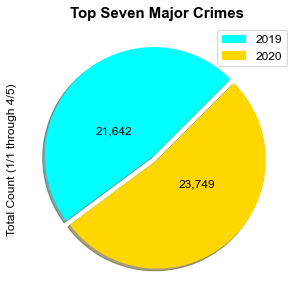

In [7]:
# Plot 2019 and 2020 total YTD - Top 7
total = [total_crime_19, total_crime_20]
labels = ["2019", "2020"]
labels1 = ["21,642", "23,749"]
colors = ['aqua', 'gold']
explode = (0.05, 0)
plt.figure(figsize=(6,5))
plt.pie(total, explode=explode, labels=labels1, colors=colors, 
        shadow=True, startangle=45, labeldistance =0.3)
plt.title("Top Seven Major Crimes", fontsize = 15, fontweight = "bold")
plt.ylabel("Total Count (1/1 through 4/5)") 
plt.legend(labels, loc="upper right")
plt.savefig("NYC_final_graphs/total_count2.png")

In [8]:
#read domestic violence data
dv_ytd = pd.read_csv('../project_one/NYC_data/Domestic Violence/domesticviolencearrests20192020.csv')
dv_ytd = dv_ytd.dropna()
dv_ytd

,Start Date,End Date,Type,Count,Description
0,1/1/2020,3/31/2020,Domestic Violence,"2,809",year to date
1,1/1/2019,3/31/2019,Domestic Violence,"2,826",year to date
2,3/1/2020,3/31/2020,Domestic Violence,902,entire month of March
3,3/1/2019,3/31/2019,Domestic Violence,"1,065",entire month of March
4,3/12/2020,3/31/2020,Domestic Violence,539,2 week period
5,3/12/2019,3/31/2019,Domestic Violence,707,2 week period
6,3/1/2020,3/29/2020,Domestic Violence,"3,104",28 day period
7,3/1/2019,3/29/2019,Domestic Violence,"3,678",28 day period


In [12]:
# remove unwanted columns 
top_plus_dv = top_seven[["Type of Crime", "2019_(Year-to-Date)", "2020_(Year-to-Date)"]]

top_plus_dv["2019_(Year-to-Date)"] = top_plus_dv["2019_(Year-to-Date)"].str.replace(",","").astype(int)
top_plus_dv["2020_(Year-to-Date)"]= top_plus_dv["2020_(Year-to-Date)"].str.replace(",","").astype(int)


top_plus_dv



C:\Users\kayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\kayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Type of Crime,2019_(Year-to-Date),2020_(Year-to-Date)
0,Murder,78,69
1,Rape,472,366
2,Robbery,2871,3515
3,Felony Assault,4688,4820
4,Burglary,2580,3221
5,Gr. Larceny,9965,10131
6,G.L.A.,988,1627


In [13]:
# append domestic violence data to top top_plus_dv
dv_row = {'Type of Crime': "Domestic Violence", "2019_(Year-to-Date)": 2826, "2020_(Year-to-Date)":2809 }

top_plus_dv = top_plus_dv.append(dv_row, ignore_index=True)
top_plus_dv


,Type of Crime,2019_(Year-to-Date),2020_(Year-to-Date)
0,Murder,78,69
1,Rape,472,366
2,Robbery,2871,3515
3,Felony Assault,4688,4820
4,Burglary,2580,3221
5,Gr. Larceny,9965,10131
6,G.L.A.,988,1627
7,Domestic Violence,2826,2809


In [14]:
period_col = ["Jan-1 through Apr-5", "Jan-1 through Apr-5","Jan-1 through Apr-5",
              "Jan-1 through Apr-5", "Jan-1 through Apr-5","Jan-1 through Apr-5",
              "Jan-1 through Apr-5", "Jan-1 through March-31"]
top_plus_dv["Period"] = period_col

# total including domestic violence
total_19 = top_plus_dv["2019_(Year-to-Date)"].sum()
total_20 = top_plus_dv["2020_(Year-to-Date)"].sum()


# add percentages to df 
top_plus_dv["2019 YTD Percentages"] = (100*(top_plus_dv["2019_(Year-to-Date)"]/top_plus_dv["2019_(Year-to-Date)"].sum()))
top_plus_dv["2020 YTD Percentages"] = (100*(top_plus_dv["2020_(Year-to-Date)"]/top_plus_dv["2020_(Year-to-Date)"].sum()))
top_plus_dv

,Type of Crime,2019_(Year-to-Date),2020_(Year-to-Date),Period,2019 YTD Percentages,2020 YTD Percentages
0,Murder,78,69,Jan-1 through Apr-5,0.318784,0.259809
1,Rape,472,366,Jan-1 through Apr-5,1.929050,1.378116
2,Robbery,2871,3515,Jan-1 through Apr-5,11.733693,13.235183
3,Felony Assault,4688,4820,Jan-1 through Apr-5,19.159719,18.148957
4,Burglary,2580,3221,Jan-1 through Apr-5,10.544385,12.128172
5,Gr. Larceny,9965,10131,Jan-1 through Apr-5,40.726663,38.146698
6,G.L.A.,988,1627,Jan-1 through Apr-5,4.037927,6.126214
7,Domestic Violence,2826,2809,Jan-1 through March-31,11.549779,10.576851


# 2019 vs 2020 Top 7 including Domestic Violence 

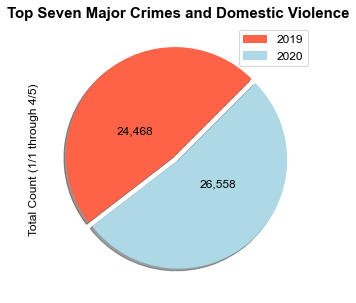

In [15]:
# Plot 2019 and 2020 total YTD 51026
total_19 = top_plus_dv["2019_(Year-to-Date)"].sum()
total_20 = top_plus_dv["2020_(Year-to-Date)"].sum()

total = [total_19, total_20]
labels = ["2019", "2020"]
labels1 = ["24,468", "26,558"]
colors = ['tomato', 'lightblue']
explode = (0.05, 0)
plt.figure(figsize=(6,5))
plt.pie(total, explode=explode, labels=labels1, colors=colors, 
        shadow=True, startangle=45, labeldistance =0.3)

plt.title("Top Seven Major Crimes and Domestic Violence", fontsize = 15, fontweight = "bold")
plt.ylabel("Total Count (1/1 through 4/5)") #does not include domestic violence yet 
plt.legend(labels, loc="upper right")
plt.savefig("NYC_final_graphs/total_count1.png")

# 2019 Major Crime Breakdown

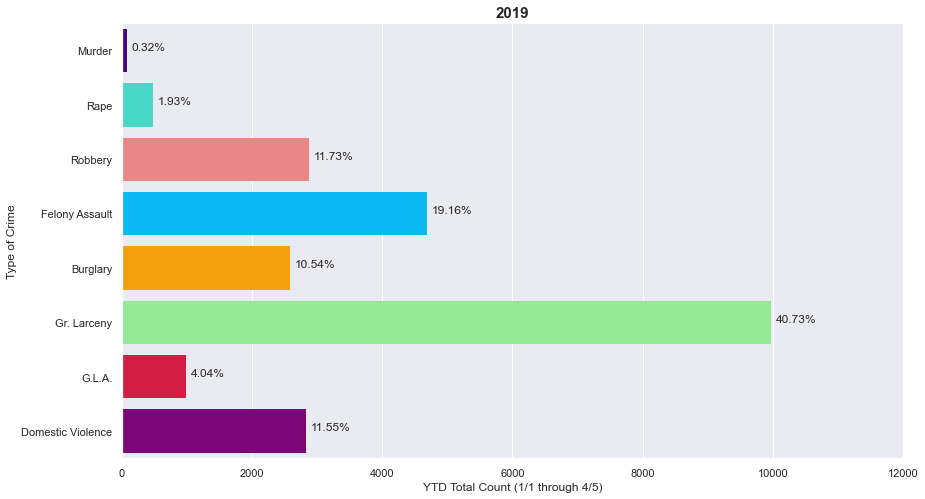

In [71]:
# using seaborn horizontal bar plot 

plt.figure(figsize=(14,8))
sns.set()
df_hra_colors = ['indigo', 'turquoise', 'lightcoral', 'deepskyblue', 'orange', 'lightgreen', 'crimson', 'purple']
ax = sns.barplot(top_plus_dv["2019_(Year-to-Date)"],top_plus_dv["Type of Crime"], palette =df_hra_colors, 
                 alpha=1,linewidth = 0, saturation=.9)
plt.xlabel('YTD Total Count (1/1 through 4/5)')
plt.title(f'2019', fontsize = 15, fontweight = "bold")
ax.set_xlim(0,12000)

thickness = top_plus_dv["2019 YTD Percentages"]

for i, p in enumerate(ax.patches):
    ax.annotate("%.2f%%" % (thickness[i]),
                    (p.get_x() + p.get_width(), p.get_y() + 0.5),
                    xytext=(5,9),  va='center', textcoords='offset points')
    
plt.savefig("NYC_final_graphs/2019.png")                
plt.show()


# 2020 Major Crime Breakdown

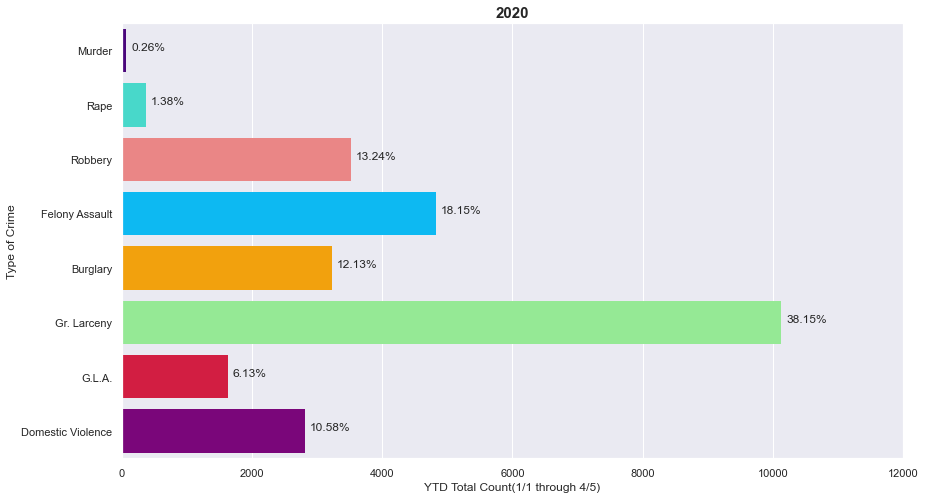

In [72]:
plt.figure(figsize=(14,8))
sns.set()
ax = sns.barplot(top_plus_dv["2020_(Year-to-Date)"],top_plus_dv["Type of Crime"],  palette =df_hra_colors, alpha=1,linewidth = 0, saturation=.9)
plt.xlabel('YTD Total Count(1/1 through 4/5)')

plt.title(f'2020', fontsize = 15, fontweight = "bold")
ax.set_xlim(0,12000)

thickness = top_plus_dv["2020 YTD Percentages"]

for i, p in enumerate(ax.patches):
    ax.annotate("%.2f%%" % (thickness[i]),
                    (p.get_x() + p.get_width(), p.get_y() + 0.5),
                    xytext=(5,9),  va='center', textcoords='offset points')
plt.savefig("NYC_final_graphs/2020.png")   
plt.show()


In [18]:
# add 2019-2020 percentage change 
top_plus_dv["YTD % Change"]= (100*((top_plus_dv["2020_(Year-to-Date)"] - top_plus_dv["2019_(Year-to-Date)"]) / top_plus_dv["2019_(Year-to-Date)"]))
top_plus_dv

,Type of Crime,2019_(Year-to-Date),2020_(Year-to-Date),Period,2019 YTD Percentages,2020 YTD Percentages,YTD % Change
0,Murder,78,69,Jan-1 through Apr-5,0.318784,0.259809,-11.538462
1,Rape,472,366,Jan-1 through Apr-5,1.929050,1.378116,-22.457627
2,Robbery,2871,3515,Jan-1 through Apr-5,11.733693,13.235183,22.431209
3,Felony Assault,4688,4820,Jan-1 through Apr-5,19.159719,18.148957,2.815700
4,Burglary,2580,3221,Jan-1 through Apr-5,10.544385,12.128172,24.844961
5,Gr. Larceny,9965,10131,Jan-1 through Apr-5,40.726663,38.146698,1.665830
6,G.L.A.,988,1627,Jan-1 through Apr-5,4.037927,6.126214,64.676113
7,Domestic Violence,2826,2809,Jan-1 through March-31,11.549779,10.576851,-0.601557


# % Change (2019-2020)

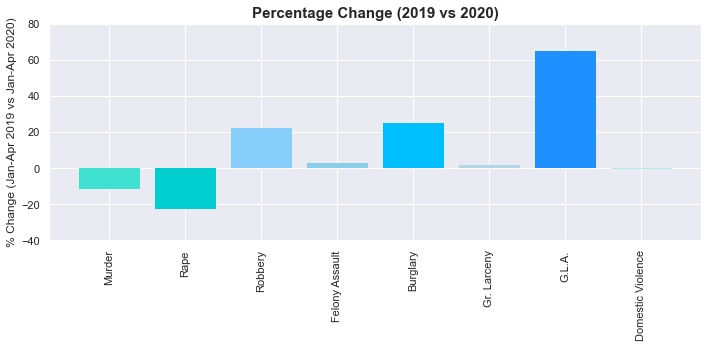

In [84]:
#OPTION 1 
# YTD 2019 vs 2020 %change 
crimes = top_plus_dv["Type of Crime"]
percentages = top_plus_dv["YTD % Change"]

plt.figure(figsize=(10,5))
color_palette_list = ['turquoise', 'darkturquoise', 'lightskyblue', 'skyblue',   
                      'deepskyblue', 'lightblue', 'dodgerblue', 'paleturquoise']

x_axis = np.arange(len(crimes))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, crimes, rotation = "vertical")
plt.title("Percentage Change (2019 vs 2020)", fontsize = 15, fontweight = "bold")
plt.ylabel("% Change (Jan-Apr 2019 vs Jan-Apr 2020)")
plt.ylim(-40, 80)
crime_labels = [value for value in x_axis]

plt.grid(which='major', axis = "both",linestyle = '-')

ax = plt.bar(x_axis, percentages, color = color_palette_list, width = 0.8, linewidth = 0)
plt.tight_layout()
plt.savefig("NYC_final_graphs/percent_change.png")
# plt.show()



In [19]:
# YTD 2019 vs 2020 %change 
crimes = top_plus_dv["Type of Crime"].to_list()
percentages = top_plus_dv["YTD % Change"]
crimes

['Murder',
 'Rape',
 'Robbery',
 'Felony Assault',
 'Burglary',
 'Gr. Larceny',
 'G.L.A.',
 'Domestic Violence']

<Figure size 720x360 with 0 Axes>

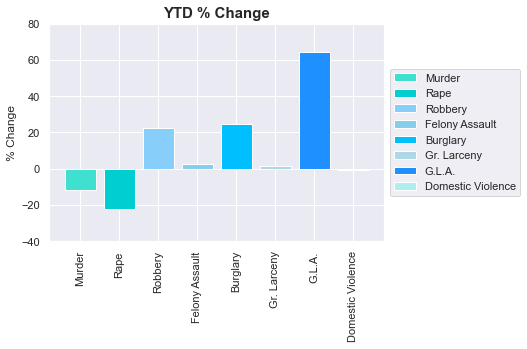

In [77]:
# OPTION 2 
menMeans = (8092, 812, 2221, 1000, 562)
N = len(menMeans)

lab = ['Google', 'MSFT', 'APPL', 'EXXON', 'WMRT']
plt.figure(figsize=(10,5))
ind = np.arange(len(crimes))  # the x locations for the groups
width = 0.8       # the width of the bars

fig, ax = plt.subplots()
my_colors = ['turquoise', 'darkturquoise', 'lightskyblue', 'skyblue',   
                      'deepskyblue', 'lightblue', 'dodgerblue', 'paleturquoise']

for x,y,c,lb in zip(ind,percentages,my_colors,crimes):
    ax.bar(x, y, width, color=c,label=lb)
plt.title("YTD % Change", fontsize = 15, fontweight = "bold")
plt.ylabel("% Change")
plt.ylim((-40,80))
# add some
# ax.set_ylabel('Count')
# ax.set_title('Trending words and their counts')

tick_locations = [value for value in ind]
plt.xticks(tick_locations, crimes, rotation = "vertical")
# ax.set_xticks(tick_locations, crimes, rotation = "vertical")
# ax.legend(lab,loc="best")
# Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=4)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig("NYC_final_graphs/percent_change.png")
# plt.show()

C:\Users\kayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """Entry point for launching an IPython kernel.


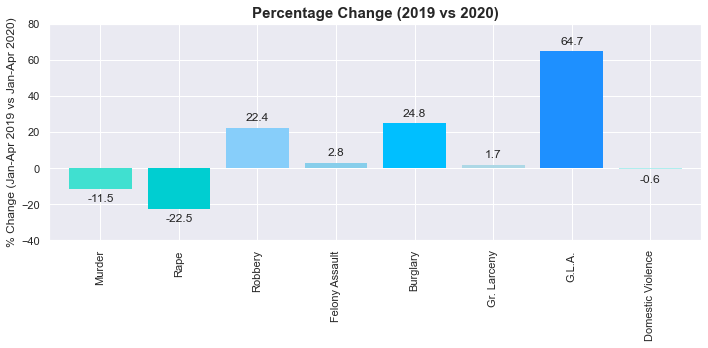

In [115]:
# OPTION 3
freq_series = pd.Series.from_array(percentages)
plt.figure(figsize=(10,5))
x_labels = crimes
my_colors = ['turquoise', 'darkturquoise', 'lightskyblue', 'skyblue',   
                      'deepskyblue', 'lightblue', 'dodgerblue', 'paleturquoise']

ax = freq_series.plot(kind='bar', width = 0.8, color = my_colors, linewidth=0)

ax.set_xticklabels(x_labels)
plt.title("Percentage Change (2019 vs 2020)", fontsize = 15, fontweight = "bold")
plt.ylabel("% Change (Jan-Apr 2019 vs Jan-Apr 2020)")
plt.ylim(-40, 80)
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                    # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.tight_layout()
plt.savefig("NYC_final_graphs/1-percent_change.png")
plt.show()